# Day 08. Exercise 04
# Regression

## 0. Imports

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [4]:
df = pd.read_csv('../data/checker_regression.csv')

In [5]:
df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,NaN
1,user_1,62,28.0,NaN
2,user_1,62,28.0,NaN
3,user_1,62,28.0,NaN
4,user_1,62,28.0,NaN
...,...,...,...,...
72,user_31,128,NaN,-104.75
73,user_4,40,NaN,-175.60
74,user_6,15,NaN,-62.60
75,user_7,8,NaN,-115.50


In [6]:
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          77 non-null     object 
 1   num_commits  77 non-null     int64  
 2   pageviews    77 non-null     float64
 3   AVG(diff)    77 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [8]:
codes, uniques = pd.factorize(df['uid'])
df['uid_codes'] = codes

In [9]:
X = df[['num_commits', 'pageviews', 'uid_codes']]
y = df['AVG(diff)']

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=21)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [12]:
def crossval(n_splits, X, y, model):
    kf = KFold(n_splits=n_splits)
    test_scores = []
    
    for train_index, test_index in kf.split(X):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        train_rmse = mean_squared_error(y_train, y_train_pred)
        
        y_test_pred = model.predict(X_test)
        test_rmse = mean_squared_error(y_test, y_test_pred)
        test_scores.append(test_rmse)
        
        print(f"train - {train_rmse} | test - {test_rmse}")
        mean_test = np.mean(test_scores)
        
    print(f"Average RMSE on crossval is {mean_test}")

In [13]:
linear = LinearRegression()
crossval(2, X_scaled, y, linear)

train - 2726.8833631953494 | test - 854.5642804919739
train - 648.7514264494657 | test - 3991.8965379242322
Average RMSE on crossval is 2423.230409208103


In [14]:
tree = DecisionTreeRegressor(max_depth=4, random_state=21)
crossval(10, X_scaled, y, tree)

train - 242.75162909286098 | test - 0.0
train - 134.6114036500268 | test - 1732.6640625
train - 145.39059903381644 | test - 1267.7631611111105
train - 242.75162909286098 | test - 0.0
train - 94.09218464841652 | test - 3118.533125
train - 95.29415861513685 | test - 7498.478888888889
train - 91.76070048309178 | test - 5794.355902777777
train - 214.27968022486775 | test - 358.0362723214288
train - 239.28374867724867 | test - 0.0
train - 99.98807936507937 | test - 3766.67003968254
Average RMSE on crossval is 2353.6501452281746


In [15]:
forest = RandomForestRegressor(random_state=21)
crossval(10, X_scaled, y, forest)

train - 189.03883381119115 | test - 0.0
train - 171.43059640941985 | test - 674.3427991527775
train - 181.87790681763258 | test - 450.18443013888935
train - 188.9154474569239 | test - 0.0
train - 147.2075291553943 | test - 1548.632764513888
train - 79.48845006562003 | test - 5445.7870732222245
train - 103.77510363848633 | test - 5447.562654777785
train - 162.37935590158696 | test - 266.0115314325388
train - 167.64679722619024 | test - 5.286061714285714
train - 156.21493551428543 | test - 822.9440968888894
Average RMSE on crossval is 1466.0751411841277


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [17]:
y_pred_linear = linear.predict(X_test)

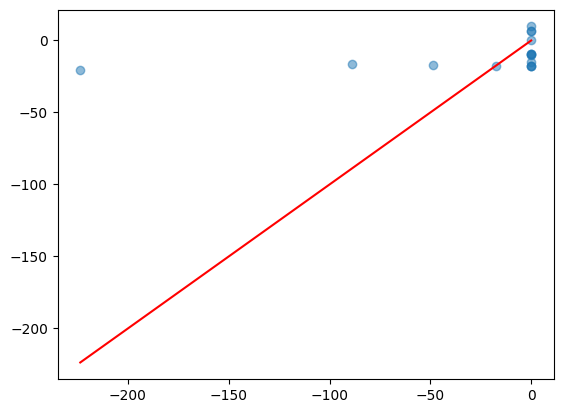

In [18]:
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

In [19]:
y_pred_tree = tree.predict(X_test)

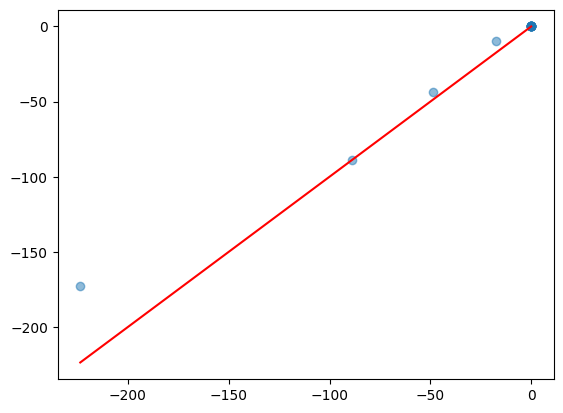

In [20]:
plt.scatter(y_test, y_pred_tree, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

In [21]:
y_pred_forest = forest.predict(X_test)

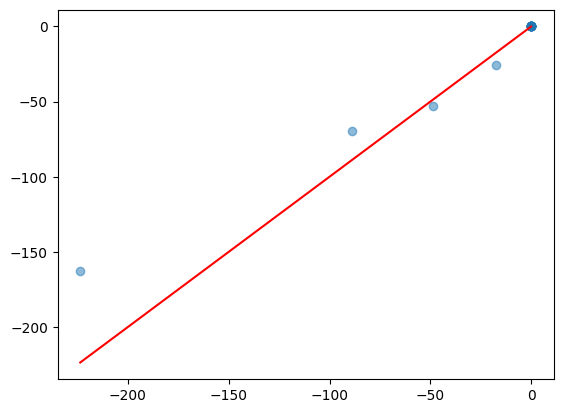

In [22]:
plt.scatter(y_test, y_pred_forest, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')